<a href="https://colab.research.google.com/github/fraazor/mushroom_classifier/blob/master/mushroom_classifier_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.tabular import *
from fastai.vision import *
import os
import numpy as np
import random

import matplotlib.pyplot as plt

In [3]:
from google.colab import drive

drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


To download the URL's from a Google image search, copy this javascript code into the developer console

urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);

window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));


In [0]:
folders = ["amanita_strobiliformis", "boletus_edulis", "chanterelles", "flammulina_velutipes", 
          "fly_agaric", "gyromitra_esculenta", "scleroderma_citrinum"]
files = ["urls_amanita_strobiliformis.csv", "urls_boletus_edulis.csv","urls_chanterelles.csv",
         "urls_flammulina_velutipes.csv", "urls_fly_agaric.csv", "urls_gyromitra_esculenta.csv",
        "urls_scleroderma_citrinum.csv"]

path = Path("./fast_ai_data/mushrooms/")

In [0]:
for folder in folders:
  dest = path/folder
  dest.mkdir(parents=True, exist_ok=True)

In [6]:
path.ls()

[PosixPath('fast_ai_data/mushrooms/scleroderma_citrinum'),
 PosixPath('fast_ai_data/mushrooms/fly_agaric'),
 PosixPath('fast_ai_data/mushrooms/amanita_strobiliformis'),
 PosixPath('fast_ai_data/mushrooms/gyromitra_esculenta'),
 PosixPath('fast_ai_data/mushrooms/flammulina_velutipes'),
 PosixPath('fast_ai_data/mushrooms/boletus_edulis'),
 PosixPath('fast_ai_data/mushrooms/chanterelles')]

Upload your locally saved urls into the created category folders

In [7]:
os.listdir("/content/fast_ai_data/mushrooms/amanita_strobiliformis")

['urls_amanita_strobiliformis.csv']

In [0]:
classes = folders

In [9]:
path

PosixPath('fast_ai_data/mushrooms')

In [0]:
counter = 0
for folder in folders:
  dest = path/folder
  download_images(path/folder/files[counter], dest, max_pics = 200)
  counter +=1

In [11]:
categories = os.listdir("/content/fast_ai_data/mushrooms")

for folder in categories:
  print(len(os.listdir("/content/fast_ai_data/mushrooms/" + folder)))

197
99
198
100
199
100
101


In [0]:
for c in classes: 
  print(c)
  verify_images(path/c, delete=True, max_size = 500)

In [0]:
categories = os.listdir("/content/fast_ai_data/mushrooms")

for folder in categories:
  print(len(os.listdir("/content/fast_ai_data/mushrooms/" + folder)))

193
99
96
2
195
96
100
193


Problem:    -unbalanced training sets

## View data

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train = ".", valid_pct=0.2, 
                                  ds_tfms=get_transforms(), size=224, 
                                  num_workers=4).normalize(imagenet_stats)

In [14]:
data.classes

['amanita_strobiliformis',
 'boletus_edulis',
 'chanterelles',
 'flammulina_velutipes',
 'fly_agaric',
 'gyromitra_esculenta',
 'scleroderma_citrinum']

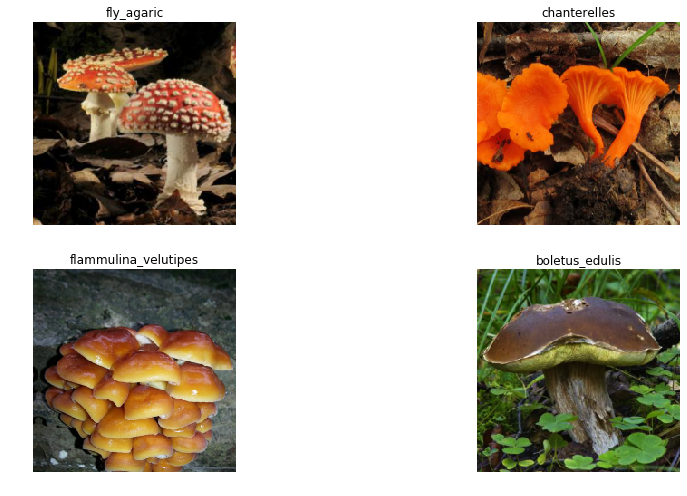

In [16]:
data.show_batch(rows=2, figsize=(15,7))

Problem: -some pictures show food or text

In [17]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['amanita_strobiliformis',
  'boletus_edulis',
  'chanterelles',
  'flammulina_velutipes',
  'fly_agaric',
  'gyromitra_esculenta',
  'scleroderma_citrinum'],
 7,
 758,
 189)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [60]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,accuracy,time
0,2.130400,0.459094,0.862434,00:12
1,1.203226,0.203735,0.936508,00:12
2,0.807016,0.212834,0.936508,00:12
3,0.584933,0.229857,0.931217,00:12
4,0.456602,0.216141,0.941799,00:12
5,0.358087,0.206715,0.941799,00:12


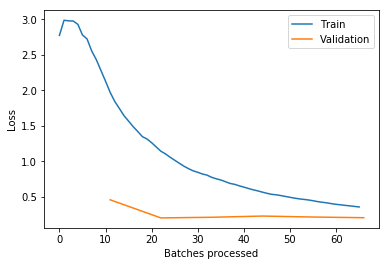

In [61]:
learn.recorder.plot_losses()

In [0]:
learn.save("/content/gdrive/My Drive/Colab Notebooks/mush_stage_1")

In [0]:
learn.unfreeze()

In [66]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


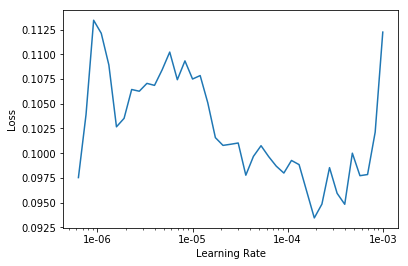

In [67]:
learn.recorder.plot()

In [68]:
learn.fit_one_cycle(2, max_lr=slice(2e-05, 1e-04))

epoch,train_loss,valid_loss,accuracy,time
0,0.120096,0.187361,0.957672,00:13
1,0.096001,0.202518,0.947090,00:13


In [0]:
learn.save("/content/gdrive/My Drive/Colab Notebooks/mush_stage_2")

## Interpretation

In [71]:
learn.load("/content/gdrive/My Drive/Colab Notebooks/mush_stage_2")

Learner(data=ImageDataBunch;

Train: LabelList (758 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
scleroderma_citrinum,scleroderma_citrinum,scleroderma_citrinum,scleroderma_citrinum,scleroderma_citrinum
Path: fast_ai_data/mushrooms;

Valid: LabelList (189 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
flammulina_velutipes,chanterelles,scleroderma_citrinum,scleroderma_citrinum,scleroderma_citrinum
Path: fast_ai_data/mushrooms;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (c

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

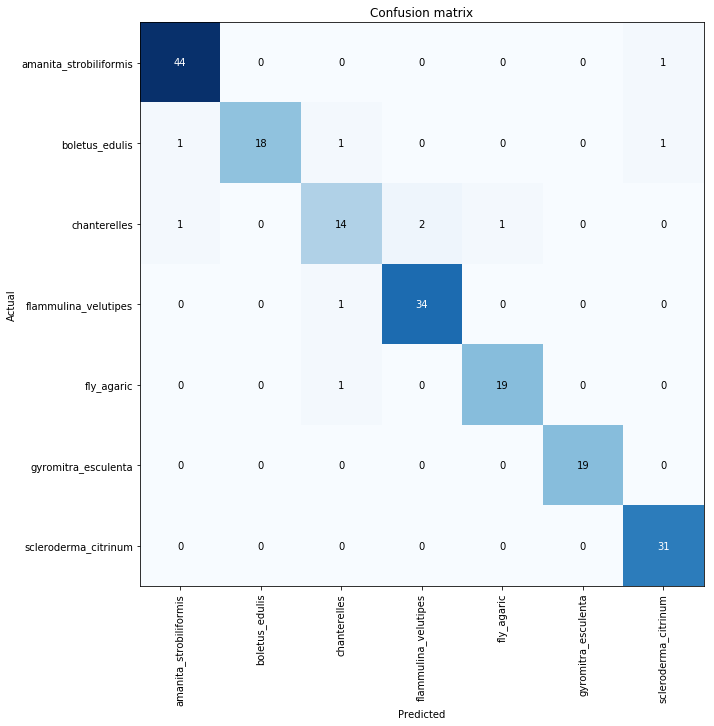

In [73]:
interp.plot_confusion_matrix(figsize=(10,10))

In [74]:
interp.most_confused()

[('chanterelles', 'flammulina_velutipes', 2),
 ('amanita_strobiliformis', 'scleroderma_citrinum', 1),
 ('boletus_edulis', 'amanita_strobiliformis', 1),
 ('boletus_edulis', 'chanterelles', 1),
 ('boletus_edulis', 'scleroderma_citrinum', 1),
 ('chanterelles', 'amanita_strobiliformis', 1),
 ('chanterelles', 'fly_agaric', 1),
 ('flammulina_velutipes', 'chanterelles', 1),
 ('fly_agaric', 'chanterelles', 1)]

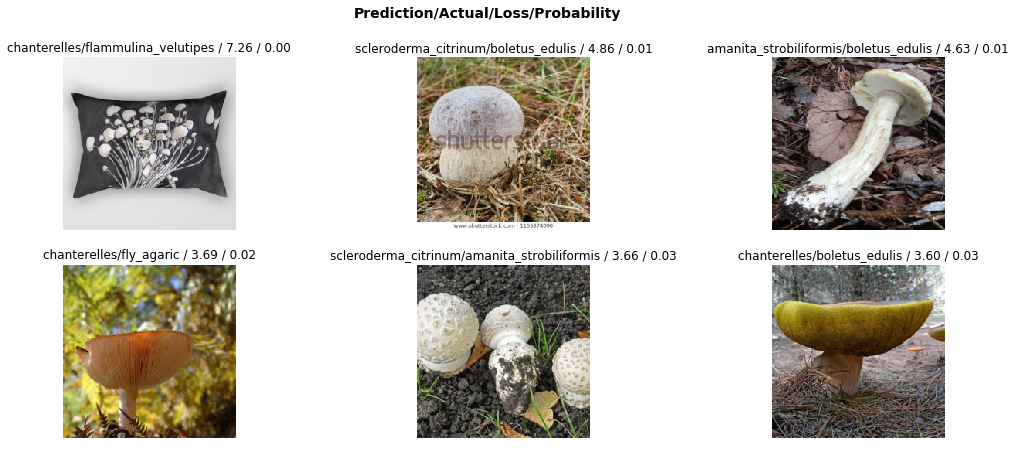

In [78]:
interp.plot_top_losses(6, figsize=(18,7), heatmap = False)

the most confused mushroom is actually a pillow

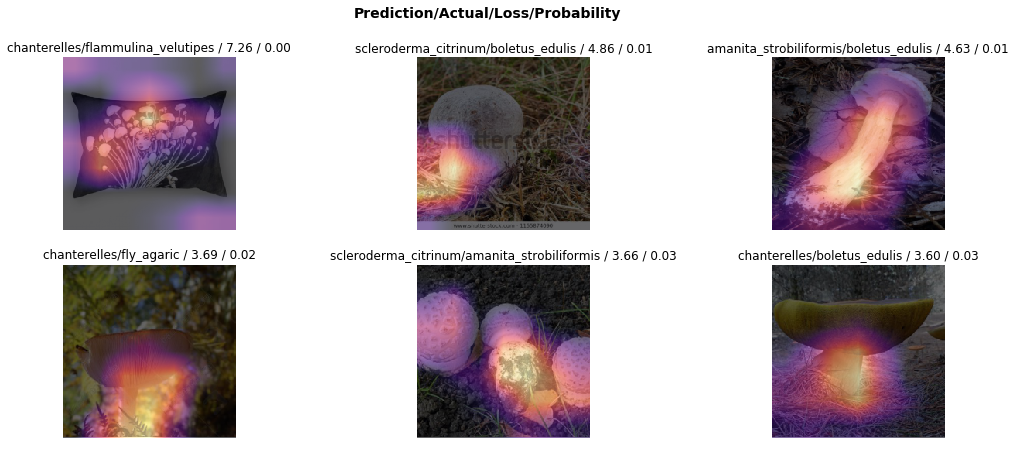

In [77]:
interp.plot_top_losses(6, figsize=(18,7), heatmap = True)

## Inference

In [0]:
learn.export()

In [0]:
defaults.device = torch.device("cpu")

In [81]:
folders

['amanita_strobiliformis',
 'boletus_edulis',
 'chanterelles',
 'flammulina_velutipes',
 'fly_agaric',
 'gyromitra_esculenta',
 'scleroderma_citrinum']

In [83]:
path

PosixPath('fast_ai_data/mushrooms')

chanterelles


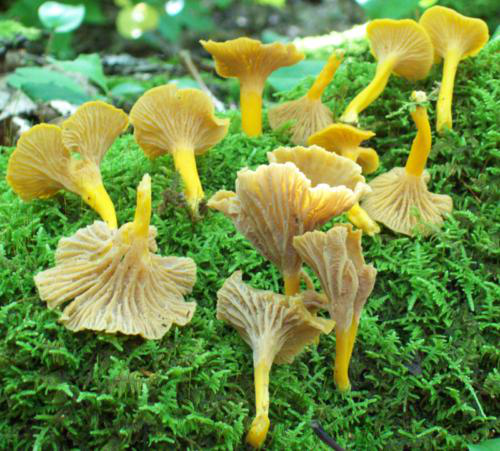

In [108]:
folder_sample = folders[2]
dir_folder_0 = os.listdir("/content/fast_ai_data/mushrooms/" + folder_sample)[0]

img = open_image("/content/fast_ai_data/mushrooms/" + folder_sample + "/" + dir_folder_0)

print(folder_sample)
img

In [0]:
learn = load_learner(path)

In [0]:
pred_class, pred_idx, outputs = learn.predict(img)

outputs_flat = outputs.squeeze().tolist()

In [99]:
for i in range(len(data.classes)):
  if outputs_flat[i] > 0.5:
    print("Probability: {0} \t Class: {1} \t is the predicted category".format(outputs_flat[i],data.classes[i]))
  else:
    print("Probability: {0} \t Class: {1}".format(outputs_flat[i],data.classes[i]))

Probability: 8.688253672062274e-08 	 Class: amanita_strobiliformis
Probability: 1.3000112097927286e-08 	 Class: boletus_edulis
Probability: 0.9996778964996338 	 Class: chanterelles 	 is the predicted category
Probability: 0.00032030593138188124 	 Class: flammulina_velutipes
Probability: 9.712118753668619e-08 	 Class: fly_agaric
Probability: 9.385668136019376e-07 	 Class: gyromitra_esculenta
Probability: 6.116119379839802e-07 	 Class: scleroderma_citrinum
